梯度代表方向，对应J增大最快的方向

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = 2 * np.random.random(size = 100)
y = x * 3. + 4. + np.random.normal(size = 100)

In [3]:
x

array([1.40087424, 1.68837329, 1.35302867, 1.45571611, 1.90291591,
       0.02540639, 0.8271754 , 0.09762559, 0.19985712, 1.01613261,
       0.40049508, 1.48830834, 0.38578401, 1.4016895 , 0.58645621,
       1.54895891, 0.01021768, 0.22571531, 0.22190734, 0.49533646,
       0.0464726 , 1.45464231, 0.68006988, 0.39500631, 1.81835919,
       1.95669397, 1.06560509, 0.5182637 , 1.16762524, 0.65138131,
       1.77779863, 1.25280905, 1.63774738, 1.09469084, 0.83342401,
       1.48609438, 0.73919276, 0.15033309, 1.55038596, 0.43881849,
       0.15868425, 0.97356104, 0.3073478 , 1.65693027, 0.38273714,
       0.54081791, 1.12206884, 1.80476078, 1.70357668, 0.83616392,
       0.78695254, 0.03244103, 0.59842674, 0.70755644, 1.78700533,
       1.57227314, 1.54277385, 0.84010971, 1.55205028, 0.92861629,
       0.36354033, 1.76805121, 1.43758454, 1.3437626 , 0.51312727,
       0.86160364, 0.03290715, 0.46998765, 1.02234262, 0.58401848,
       1.00378702, 0.99654626, 0.20754305, 0.89288623, 1.93837

In [4]:
X = x.reshape(-1, 1)

In [5]:
X

array([[1.40087424],
       [1.68837329],
       [1.35302867],
       [1.45571611],
       [1.90291591],
       [0.02540639],
       [0.8271754 ],
       [0.09762559],
       [0.19985712],
       [1.01613261],
       [0.40049508],
       [1.48830834],
       [0.38578401],
       [1.4016895 ],
       [0.58645621],
       [1.54895891],
       [0.01021768],
       [0.22571531],
       [0.22190734],
       [0.49533646],
       [0.0464726 ],
       [1.45464231],
       [0.68006988],
       [0.39500631],
       [1.81835919],
       [1.95669397],
       [1.06560509],
       [0.5182637 ],
       [1.16762524],
       [0.65138131],
       [1.77779863],
       [1.25280905],
       [1.63774738],
       [1.09469084],
       [0.83342401],
       [1.48609438],
       [0.73919276],
       [0.15033309],
       [1.55038596],
       [0.43881849],
       [0.15868425],
       [0.97356104],
       [0.3073478 ],
       [1.65693027],
       [0.38273714],
       [0.54081791],
       [1.12206884],
       [1.804

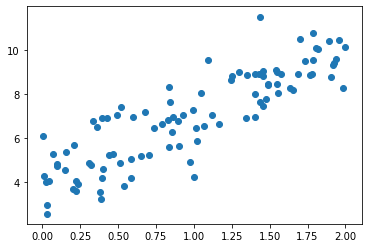

In [6]:
plt.scatter(x,y)

### 使用梯度下降法训练
目标：使$\dfrac {1}{m}\sum ^{m}_{i=1}\left( y^{(i)}-\widehat {y}^{(i)}\right) ^{2}$
尽可能小  
$J\left( \theta \right) = MSE(y, \widehat {y})  \ \  \ \ \ \ \  \ \nabla J\left( \theta \right) =\begin{bmatrix} \dfrac {\partial J}{\partial \theta_{0} }\cdot \\ \dfrac {\partial J}{\partial \theta _{1}} \\  \dfrac {\partial J}{\partial \theta _{2}} \\ ... \\ \dfrac {\partial J}{\partial \theta _{n}} \end{bmatrix} = \dfrac {2}{m} · \begin{bmatrix} \sum ^{m}_{i=1}\left( x^{(i)}_b\theta -y^{(i)}\right) \\  \sum ^{m}_{i=1}\left( x^{(i)}_b\theta -y^{(i)}\right)·x^{(i)}_1 \\  \sum ^{m}_{i=1}\left( x^{(i)}_b\theta -y^{(i)}\right)·x^{(i)}_2 \\ ... \\  \sum ^{m}_{i=1}\left( x^{(i)}_b\theta -y^{(i)}\right)·x^{(i)}_n \end{bmatrix}$  
有个重复的地方，可以保存起来，避免多次计算。

In [7]:
def J(theta, X_b, y):
    try:
        return np.sum((y - x_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')

In [8]:
# 这里涉及到公式的编程实现，使用了dot()函数和sum()函数
def dJ(theta, X_b, y):
    # 提前开辟出res向量的空间，在for循环里，可以直接写res[i]
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    return res * 2 / len(y)

In [9]:
#  加入了迭代次数之后的改进
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon = 1e-8):
    theta = initial_theta
    i_iter = 0
         
    while i_iter < n_iters :
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        # 理论上导数为0的时候，就找到了极值点，但是实际使用中有可能一直找不到整整为0的点，而只能达到很接近0的一个范围
        # 对浮点数进行 ==0 是很危险的，计算机处理浮点数是有误差的，可能永远都达不到想要的精度
    

        # 两种思路解决，一种是前后的函数值差小于一个极小值，一种是梯度小于一个极小值，其实意义一样
        if(abs(J(theta, X_b, y) -J(last_theta, X_b, y) ) < epsilon):  # 找了45次  
        #if(abs(grandient) < epsilon): # 找了91次，为什么会不一样呢？
        #if (abs(grandient) < epsilon) and (abs(J(theta) -J(last_theta) ) < epsilon):
            break        
        
        i_iter += 1
    return theta

In [10]:
X_b = np.hstack([np.ones((len(X),1)), X])
initial_theta = np.zeros(X_b.shape[1])

In [11]:
eta = 0.01

In [12]:
epsilon = 1e-8

In [13]:
gradient_descent(X_b, y, initial_theta, eta)

array([4.02369667, 3.00517447])

### 测试封装好的线性回归算法

In [14]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X,y)

LinearRegression()

In [15]:
lin_reg.coef_

array([3.00706277])